In [145]:
import pandas as pd

In [146]:
df = pd.read_csv("./data/train.csv")

C:\Users\Usuario\AppData\Local\Temp\ipykernel_22640\599420964.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./data/train.csv")


<Axes: >

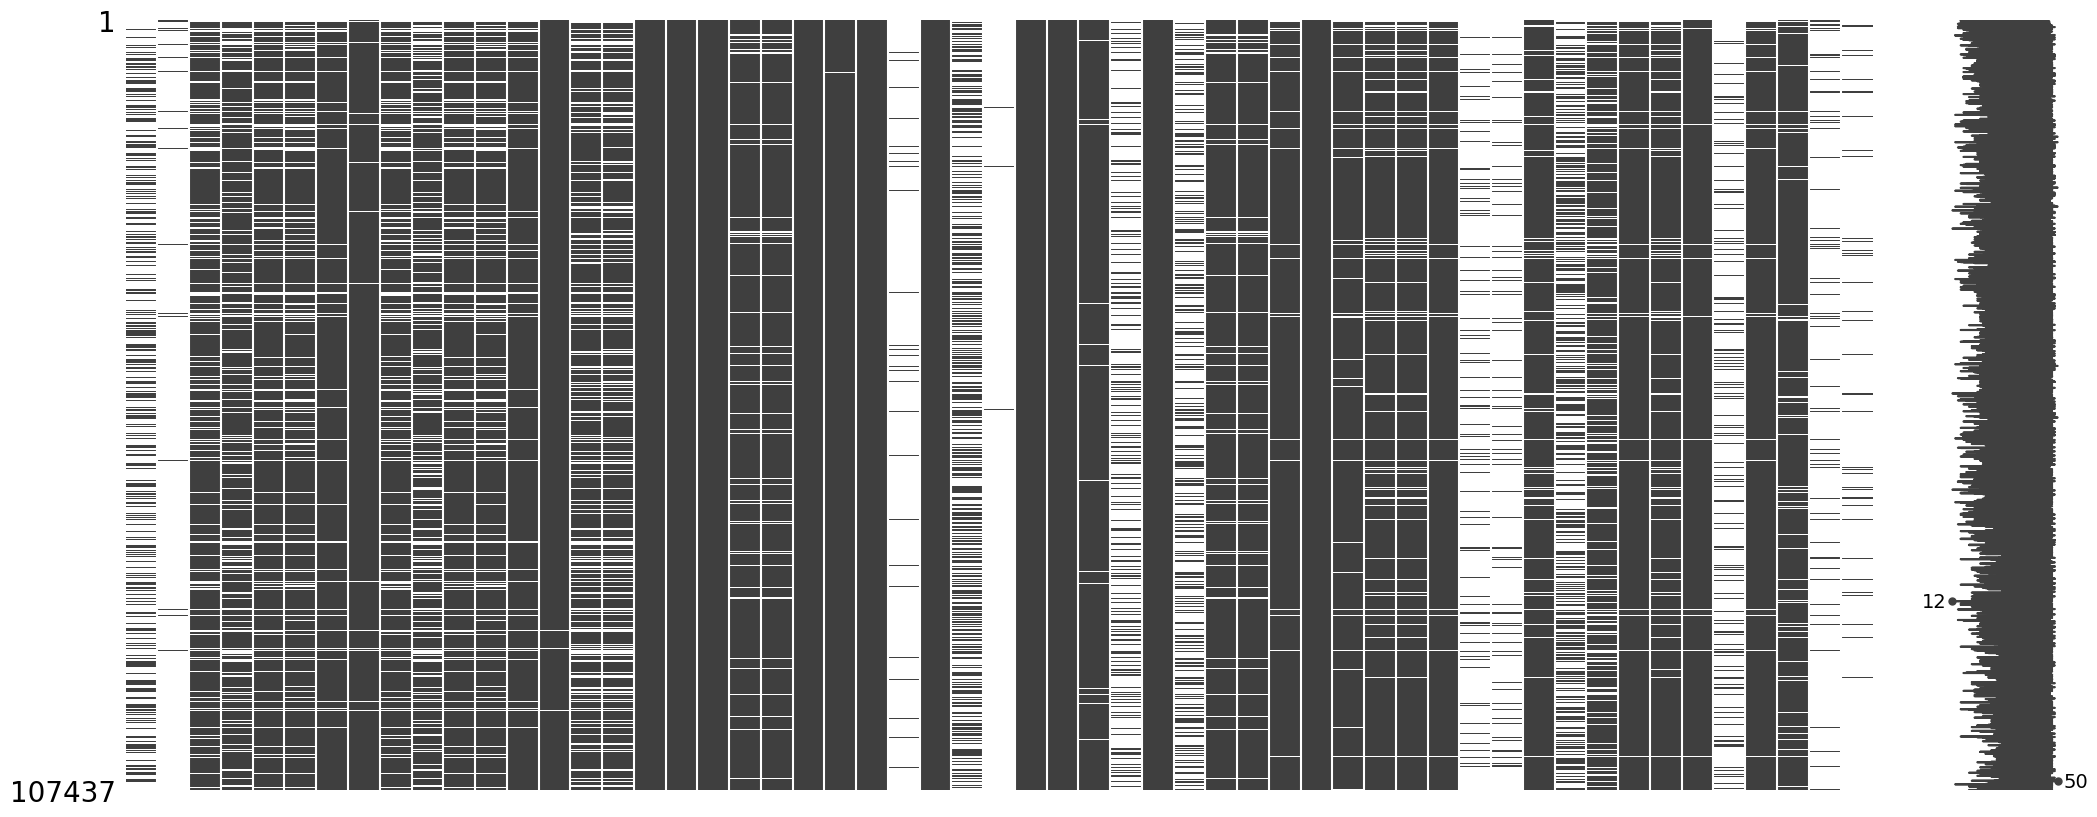

In [38]:
import missingno as msno

msno.matrix(df)

In [39]:
numeric_features = []
list_features = [
    'ImageData.features_reso.results',
    'ImageData.room_type_reso.results',
    'Characteristics.LotFeatures',
    'Structure.Basement',
    'Structure.Cooling',
    'Structure.Heating'
]
categorical_features = []
for col in df.columns:
    if col == 'Listing.Price.ClosePrice':
        continue
    if pd.api.types.is_numeric_dtype(df[col]):
        numeric_features.append(col)
    elif col not in list_features:
        categorical_features.append(col)
    
coord_features = ['Location.GIS.Latitude', 'Location.GIS.Longitude']

numeric_features = [f for f in numeric_features 
                        if f not in coord_features]


In [40]:
print(numeric_features)
print(categorical_features)
print(coord_features) # All within the city of Chicago
print(list_features)

['Characteristics.LotSizeSquareFeet', 'ImageData.c1c6.summary.bathroom', 'ImageData.c1c6.summary.exterior', 'ImageData.c1c6.summary.interior', 'ImageData.c1c6.summary.kitchen', 'ImageData.c1c6.summary.property', 'ImageData.q1q6.summary.bathroom', 'ImageData.q1q6.summary.exterior', 'ImageData.q1q6.summary.interior', 'ImageData.q1q6.summary.kitchen', 'ImageData.q1q6.summary.property', 'Structure.BathroomsFull', 'Structure.BathroomsHalf', 'Structure.BedroomsTotal', 'Structure.BelowGradeFinishedArea', 'Structure.BelowGradeUnfinishedArea', 'Structure.FireplacesTotal', 'Structure.GarageSpaces', 'Structure.LivingArea', 'Structure.Rooms.RoomsTotal', 'Structure.YearBuilt']
['ImageData.style.exterior.summary.label', 'ImageData.style.stories.summary.label', 'Listing.Dates.CloseDate', 'Listing.ListingId', 'Location.Address.CensusBlock', 'Location.Address.CensusTract', 'Location.Address.City', 'Location.Address.CountyOrParish', 'Location.Address.PostalCode', 'Location.Address.PostalCodePlus4', 'Loc

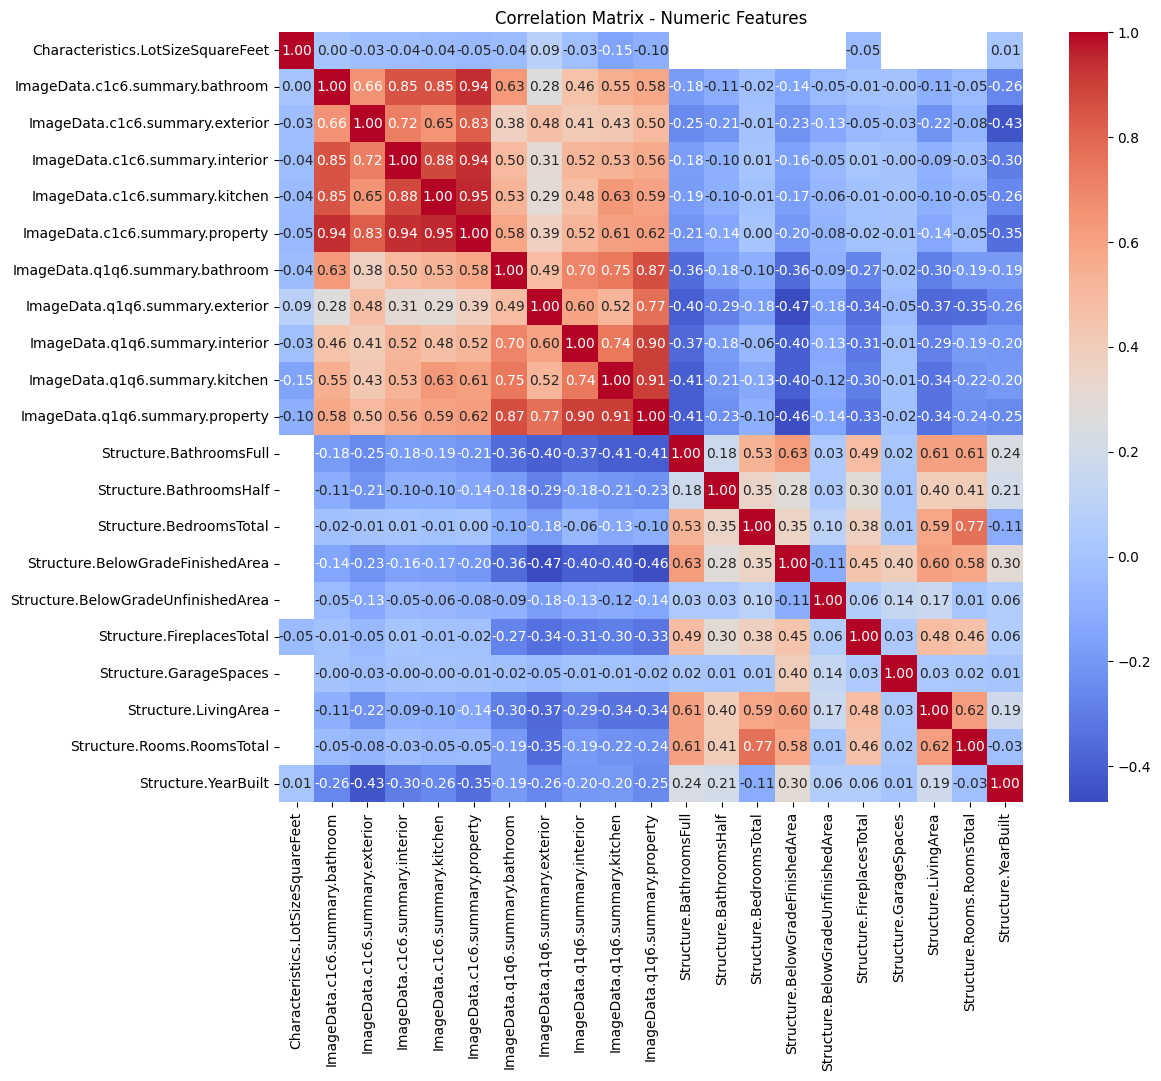

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from prince import MCA  # For multiple correspondence analysis
from scipy.stats import chi2_contingency

df['Listing.Dates.CloseDate'] = pd.to_datetime(df['Listing.Dates.CloseDate'], errors='coerce')

plt.figure(figsize=(12, 10))
correlation_matrix = df[numeric_features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix - Numeric Features")
plt.show()

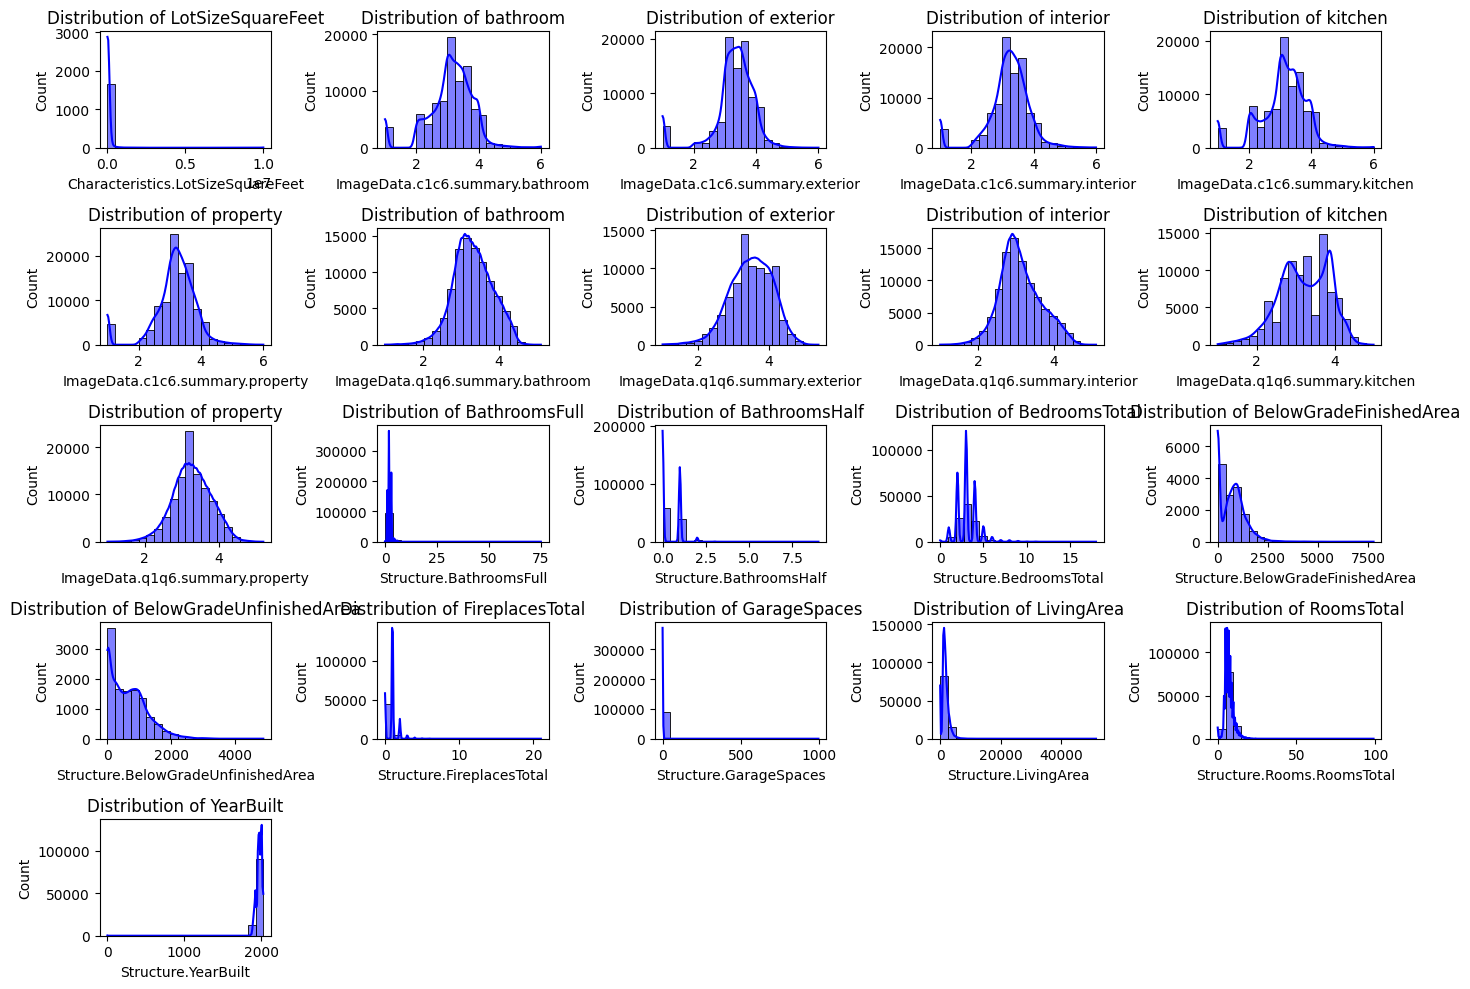

In [42]:
plt.figure(figsize=(14, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(5, 5, i)
    sns.histplot(df[feature], kde=True, color='blue', bins=20)

    plt.title(f'Distribution of {feature.split(".")[-1]}')
plt.tight_layout()
plt.show()

<Axes: xlabel='Listing.Price.ClosePrice', ylabel='Count'>

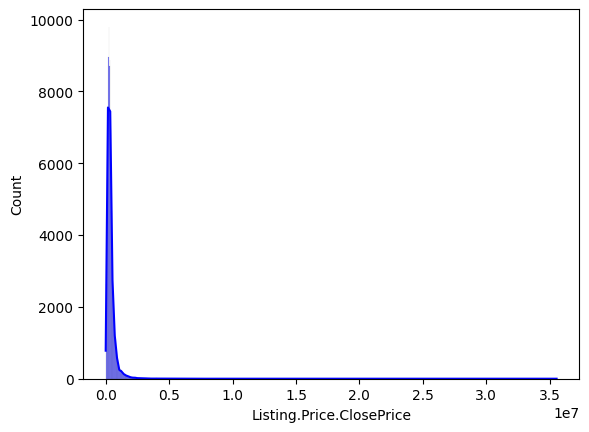

In [127]:
sns.histplot(df['Listing.Price.ClosePrice'], kde=True, color='blue', bins=1000)

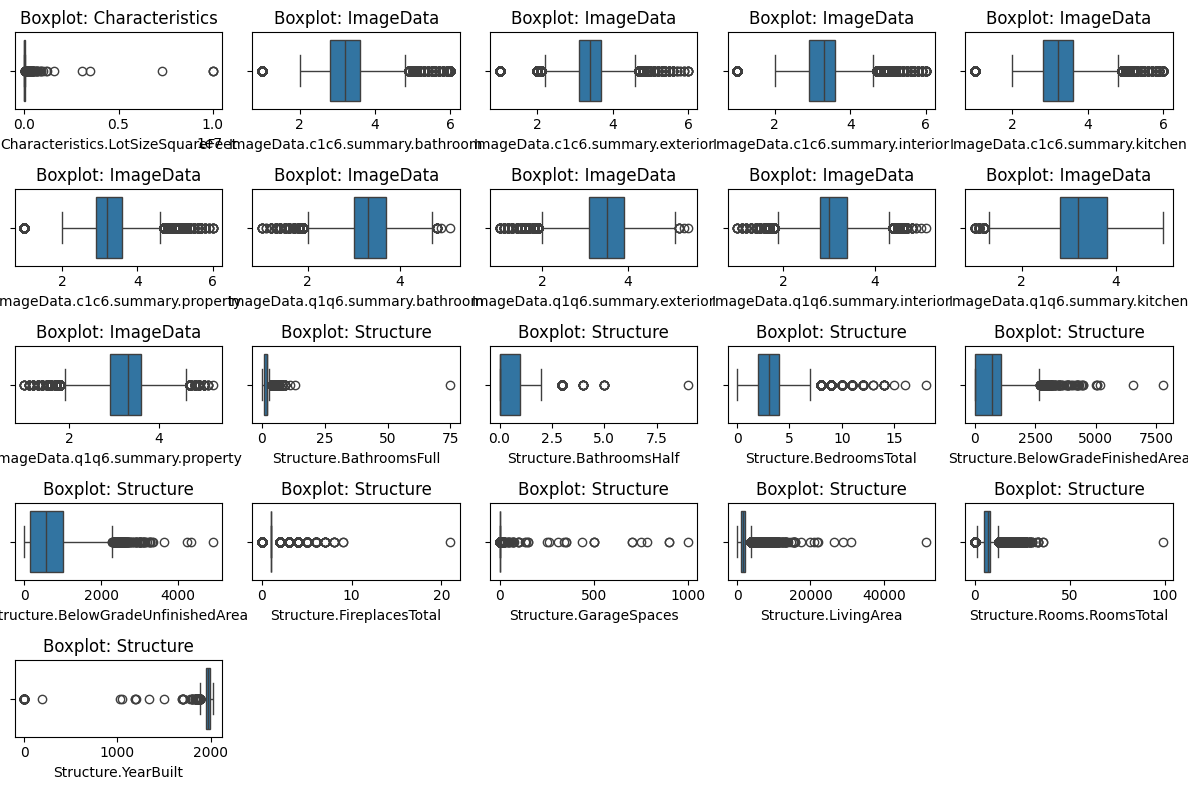

In [43]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot: {feature.split(".")[0]}')
plt.tight_layout()
plt.show()

In [44]:
categorical_features

['ImageData.style.exterior.summary.label',
 'ImageData.style.stories.summary.label',
 'Listing.Dates.CloseDate',
 'Listing.ListingId',
 'Location.Address.CensusBlock',
 'Location.Address.CensusTract',
 'Location.Address.City',
 'Location.Address.CountyOrParish',
 'Location.Address.PostalCode',
 'Location.Address.PostalCodePlus4',
 'Location.Address.StateOrProvince',
 'Location.Address.StreetDirectionPrefix',
 'Location.Address.StreetDirectionSuffix',
 'Location.Address.StreetName',
 'Location.Address.StreetNumber',
 'Location.Address.StreetSuffix',
 'Location.Address.UnitNumber',
 'Location.Address.UnparsedAddress',
 'Location.Area.SubdivisionName',
 'Location.School.HighSchoolDistrict',
 'Property.PropertyType',
 'Structure.NewConstructionYN',
 'Structure.ParkingFeatures',
 'Tax.Zoning',
 'UnitTypes.UnitTypeType']

In [45]:
low_categories = [feature for feature in categorical_features if  len(df[feature].unique()) < 25]

In [46]:
len(low_categories)

8

In [47]:
high_categories =list((set(categorical_features) - set(low_categories)))

In [48]:
for a in high_categories:
    print(a, len(df[a].unique()))

Location.Address.CountyOrParish 81
Listing.Dates.CloseDate 353
Location.Address.CensusTract 2715
Location.Address.StreetName 13403
ImageData.style.exterior.summary.label 42
Structure.ParkingFeatures 639
Location.Address.PostalCode 1477
Location.Address.UnitNumber 3963
Listing.ListingId 107437
Location.Area.SubdivisionName 7830
Location.Address.PostalCodePlus4 1505
Location.School.HighSchoolDistrict 512
Location.Address.City 834
Location.Address.UnparsedAddress 106102
Location.Address.StreetNumber 17111
UnitTypes.UnitTypeType 80
Location.Address.CensusBlock 55656


In [49]:
print(df["Location.Address.City"].unique())

['morrison' 'highland park' 'chicago' 'wilmington' 'maple park' 'big rock'
 'carol stream' 'beach park' 'park city' 'watseka' 'maywood' 'rantoul'
 'crystal lake' 'lockport' 'tuscola' 'skokie' 'dixon' 'woodstock'
 'palatine' 'hinckley' 'dekalb' 'harvard' 'aurora' 'fox lake'
 'arlington heights' 'plainfield' 'wheaton' 'buffalo grove'
 'fox river grove' 'oswego' 'berwyn' 'itasca' 'braidwood' 'brookfield'
 'riverdale' 'oak park' 'east moline' 'yorkville' 'hanover park' 'kildeer'
 'morton grove' 'des plaines' 'barrington' 'morris' 'mark' 'poplar grove'
 'hampshire' 'dwight' 'mt. carroll' 'granville' 'waukegan' 'burr ridge'
 'rockford' 'winnetka' 'cicero' 'bull valley' 'naperville' 'dixmoor'
 'mettawa' 'northbrook' 'bloomington' 'joliet' 'sleepy hollow' 'frankfort'
 'lanark' 'princeton' 'stockton' 'woodridge' 'prophetstown' 'capron'
 'glen ellyn' 'mchenry' 'lemont' 'sterling' 'st. charles' 'orland park'
 'wonder lake' 'chicago heights' 'la grange' 'long grove' 'lake zurich'
 'mazon' 'glenvie

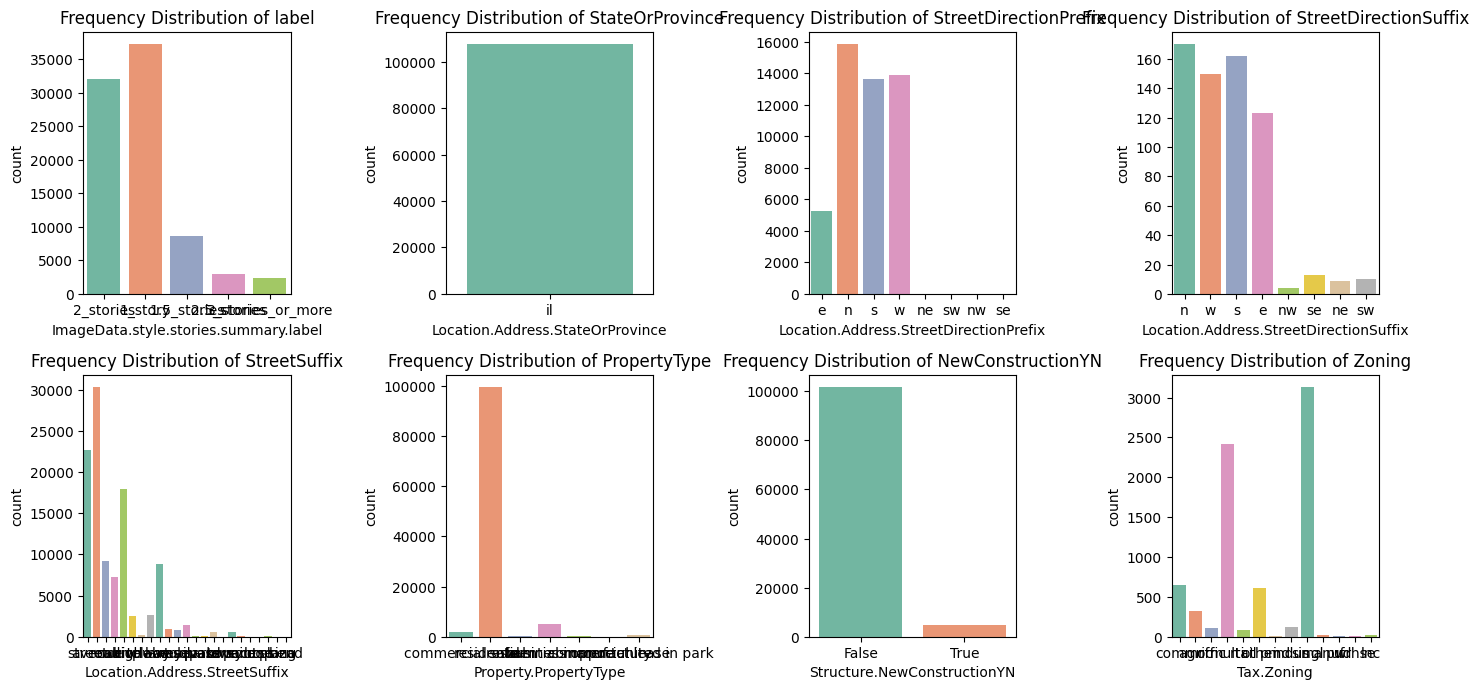

In [50]:
plt.figure(figsize=(14, 10))
for i, feature in enumerate(low_categories, 1):
    plt.subplot(3, 4, i)
    sns.countplot(x=df[feature], hue = df[feature], palette='Set2', legend=None)
    plt.title(f'Frequency Distribution of {feature.split(".")[-1]}')
plt.tight_layout()
plt.show()

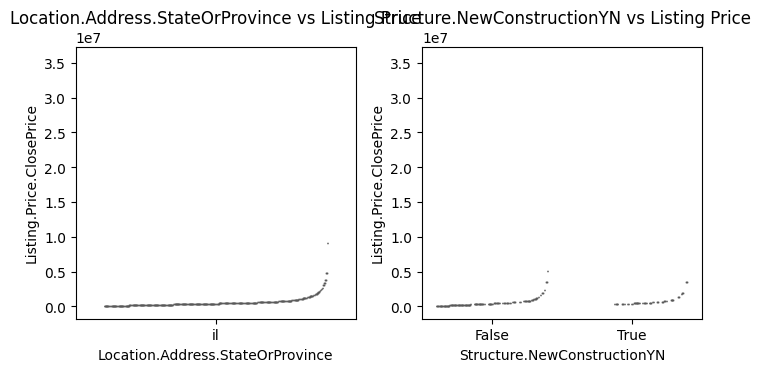

In [52]:
plt.figure(figsize=(14, 10))
for i, feature in enumerate([feature for feature in categorical_features if  len(df[feature].unique()) < 5], 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df[feature], y=df['Listing.Price.ClosePrice'], hue =df['Listing.Price.ClosePrice'], legend=None, palette='Set2')
    plt.title(f'{feature} vs Listing Price')
plt.tight_layout()
plt.show()


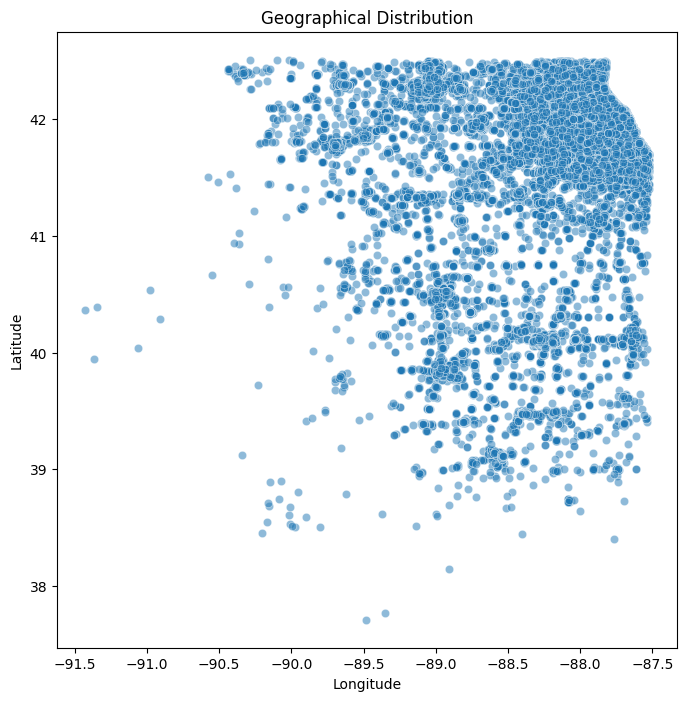

In [ ]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=df['Location.GIS.Latitude'], y=df['Location.GIS.Longitude'], alpha=0.5) # They are flipped
plt.title("Geographical Distribution")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

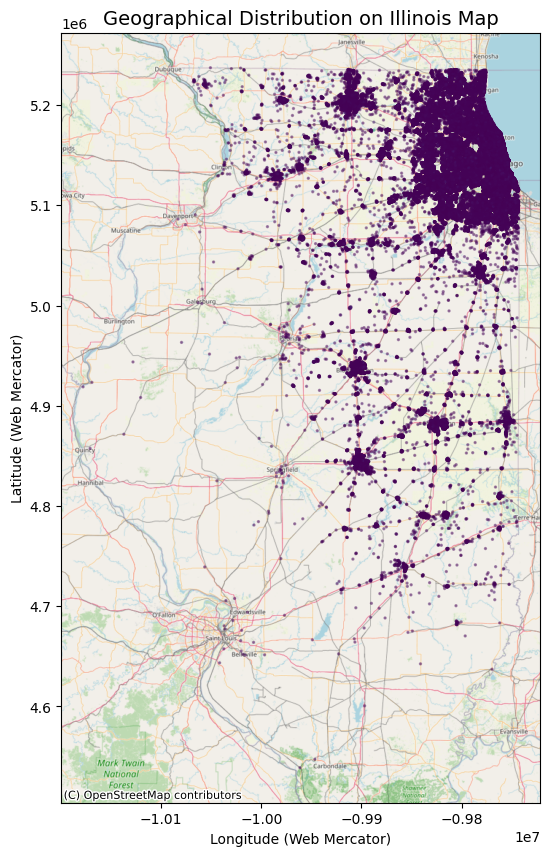

In [66]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

gdf = gpd.GeoDataFrame(
    df, 
    geometry=gpd.points_from_xy(df['Location.GIS.Latitude'], df['Location.GIS.Longitude']),
    crs="EPSG:4326"  # WGS 84
)

gdf = gdf.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, alpha=0.4, c=df['Listing.Price.ClosePrice'], markersize=2)

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

ax.set_title("Geographical Distribution on Illinois Map", fontsize=14)
ax.set_xlabel("Longitude (Web Mercator)")
ax.set_ylabel("Latitude (Web Mercator)")

plt.show()

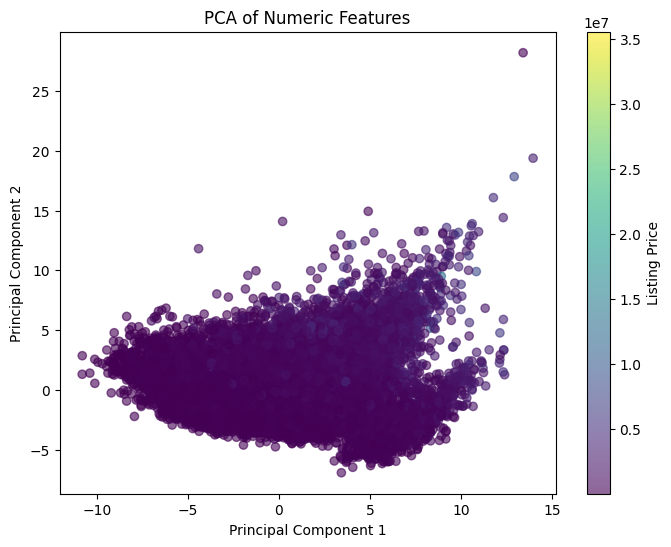

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
n = df.sample(1000)
nn = n[numeric_features]

imputer = SimpleImputer(strategy='median')
nn = imputer.fit_transform(nn)

scaler = StandardScaler()


df_scaled = scaler.fit_transform(nn)


pca = PCA(n_components=4)
pca_result = pca.fit_transform(df_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.6, c=n['Listing.Price.ClosePrice'], cmap='viridis')
plt.title('PCA of Numeric Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Listing Price')
plt.show()


PCA Loadings (Top 4 Components):
                                         PC1       PC2       PC3       PC4
Characteristics.LotSizeSquareFeet  -0.000414 -0.000903  0.013388  0.022045
ImageData.c1c6.summary.bathroom    -0.298290  0.229179  0.188700 -0.161540
ImageData.c1c6.summary.exterior    -0.254514  0.116035  0.324376  0.259226
ImageData.c1c6.summary.interior    -0.299888  0.242613  0.219822 -0.099819
ImageData.c1c6.summary.kitchen     -0.302885  0.231562  0.182659 -0.159787
ImageData.c1c6.summary.property    -0.321210  0.226744  0.245778 -0.010258
ImageData.q1q6.summary.bathroom    -0.296837  0.012469 -0.301876 -0.137747
ImageData.q1q6.summary.exterior    -0.231872 -0.141232 -0.192891  0.271685
ImageData.q1q6.summary.interior    -0.292006 -0.012726 -0.384070 -0.043505
ImageData.q1q6.summary.kitchen     -0.312971 -0.006449 -0.286100 -0.125189
ImageData.q1q6.summary.property    -0.334656 -0.031999 -0.335275  0.011581
Structure.BathroomsFull             0.186656  0.339838 -0.074561  0

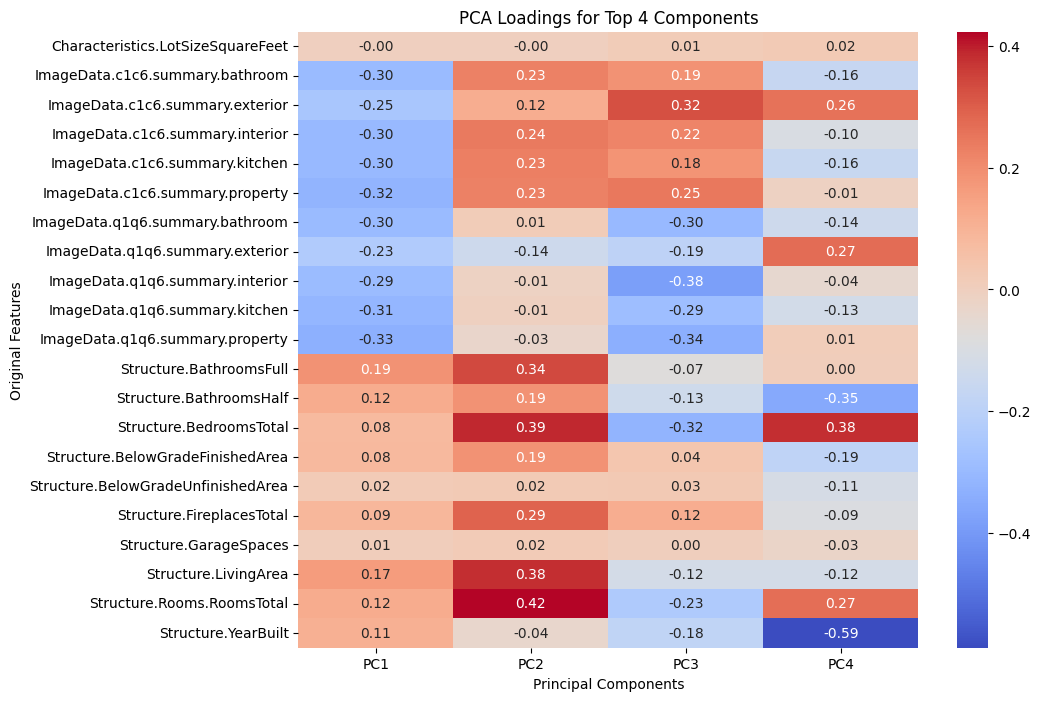

In [102]:
loadings = pd.DataFrame(
    pca.components_.T,  # Transpose to get variables as rows
    columns=[f'PC{i+1}' for i in range(4)],  # Component names
    index=numeric_features  # Original feature names
)

# Display the loadings for interpretation
print("PCA Loadings (Top 4 Components):")
print(loadings)

# Plot heatmap of loadings
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(loadings, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('PCA Loadings for Top 4 Components')
plt.xlabel('Principal Components')
plt.ylabel('Original Features')
plt.show()

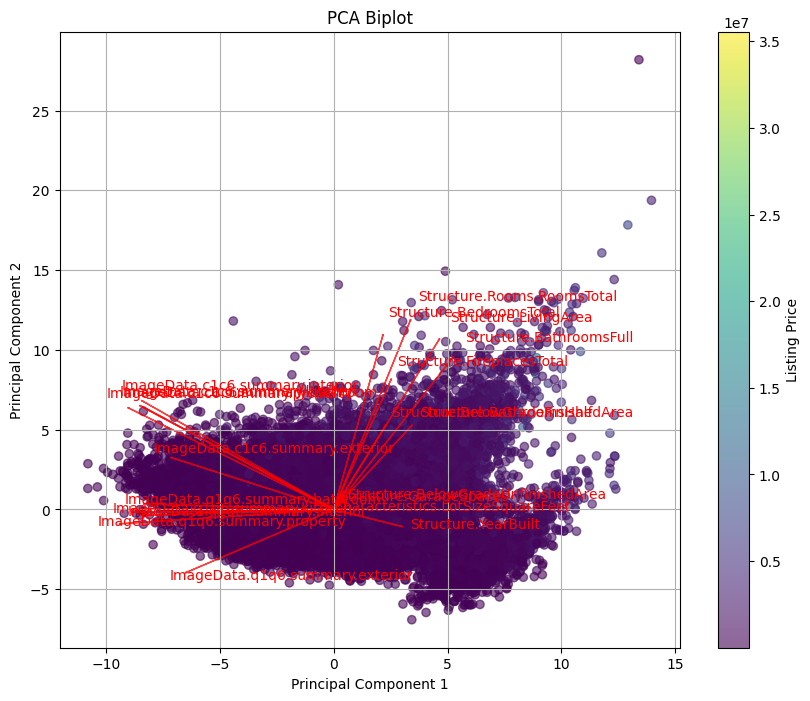

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

loadings = pca.components_.T  # Transpose to align with variables
loadings *= np.max(pca_result[:, :2])  # Scale loadings for visualization

plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.6, 
            c=n['Listing.Price.ClosePrice'], cmap='viridis')
plt.colorbar(label='Listing Price')
plt.title('PCA Biplot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Plot loadings as arrows
for i, (x, y) in enumerate(loadings[:, :2]):  # Only use first 2 components
    plt.arrow(0, 0, x, y, color='red', alpha=0.75, head_width=0.05, length_includes_head=True)
    plt.text(x * 1.1, y * 1.1, numeric_features[i], color='red', fontsize=10)

# Add a grid and show the plot
plt.grid()
plt.show()


In [ ]:
sns.pairplot(df[numeric_features + ['Listing.Price.ClosePrice']])
plt.show()

In [110]:
from scipy.stats import ttest_ind, pearsonr, chi2_contingency

In [ ]:
# Pearson correlation test for specific numeric features
pearson_corr, p_value = pearsonr(df['Structure.BedroomsTotal'], df['Listing.Price.ClosePrice'])
print(f"Pearson Correlation between Bedrooms and Listing Price: {pearson_corr:.2f}, p-value: {p_value:.3f}")


In [121]:
# Chi-Square test between two categorical variables
contingency_table = pd.crosstab(df['Location.Address.City'], df['Structure.NewConstructionYN'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Test: chi2 = {chi2:.2f}, p-value = {p:.3f}")


Chi-Square Test: chi2 = 12424.76, p-value = 0.000


In [123]:
print(numeric_features)
print(categorical_features)
print(coord_features)
print(list_features)

['Characteristics.LotSizeSquareFeet', 'ImageData.c1c6.summary.bathroom', 'ImageData.c1c6.summary.exterior', 'ImageData.c1c6.summary.interior', 'ImageData.c1c6.summary.kitchen', 'ImageData.c1c6.summary.property', 'ImageData.q1q6.summary.bathroom', 'ImageData.q1q6.summary.exterior', 'ImageData.q1q6.summary.interior', 'ImageData.q1q6.summary.kitchen', 'ImageData.q1q6.summary.property', 'Structure.BathroomsFull', 'Structure.BathroomsHalf', 'Structure.BedroomsTotal', 'Structure.BelowGradeFinishedArea', 'Structure.BelowGradeUnfinishedArea', 'Structure.FireplacesTotal', 'Structure.GarageSpaces', 'Structure.LivingArea', 'Structure.Rooms.RoomsTotal', 'Structure.YearBuilt']
['ImageData.style.exterior.summary.label', 'ImageData.style.stories.summary.label', 'Listing.Dates.CloseDate', 'Listing.ListingId', 'Location.Address.CensusBlock', 'Location.Address.CensusTract', 'Location.Address.City', 'Location.Address.CountyOrParish', 'Location.Address.PostalCode', 'Location.Address.PostalCodePlus4', 'Loc

In [ ]:

for num_feature in numeric_features:
    for cat_feature in categorical_features:
        contingency_table = pd.crosstab(df[cat_feature], pd.qcut(df[num_feature], q=4, duplicates='drop'))
        chi2, p, _, _ = chi2_contingency(contingency_table)
        print(f"Chi-Squared Test between {num_feature} and {cat_feature}: p-value={p:.3f}")

In [147]:
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [152]:
# Initialize Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)  # Set contamination rate as 5% (adjustable)
outlier_predictions = iso_forest.fit_predict(df_scaled)

# Add predictions to the DataFrame
df['Outlier'] = outlier_predictions  # 1 for inliers, -1 for outliers


In [153]:
nn = imputer.transform(df[numeric_features])

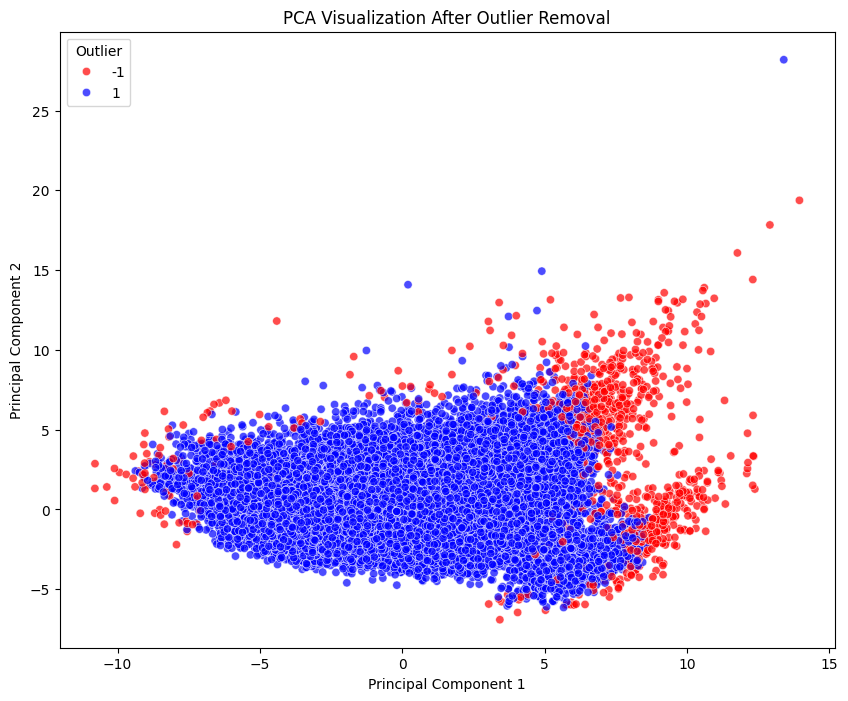

In [154]:
# Reapply PCA to cleaned data
pca_cleaned = PCA(n_components=2)
pca_result_cleaned = pca_cleaned.fit_transform(scaler.fit_transform(nn))

# Visualize cleaned data
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=pca_result_cleaned[:, 0], y=pca_result_cleaned[:, 1], hue = df['Outlier'],
    alpha=0.7, color='blue',  palette={1: 'blue', -1: 'red'}
)
plt.title('PCA Visualization After Outlier Removal')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [156]:
import osmnx as ox
from tqdm import tqdm

In [ ]:

import overpy
import numpy as np
from collections import defaultdict

def get_amenity_counts(lon, lat, radius):
    """
    Get counts of various amenities within a radius of a point using OpenStreetMap data.
    
    Args:
        lon (float): Longitude of the center point
        lat (float): Latitude of the center point
        radius (float): Radius in meters
        
    Returns:
        dict: Counts of different amenities
    """
    # Calculate bounding box
    north = lat + radius/111000
    south = lat - radius/111000
    east = lon + radius/(111000*np.cos(np.deg2rad(lat)))
    west = lon - radius/(111000*np.cos(np.deg2rad(lat)))
    
    # Initialize Overpass API
    api = overpy.Overpass()
    
    # Create an efficient query that gets all amenities at once
    # Using area-based search and timeout to optimize performance
    query = f"""
    [out:json][timeout:25];
    (
        way["leisure"="park"]({south},{west},{north},{east});
        node["amenity"="school"]({south},{west},{north},{east});
        way["amenity"="school"]({south},{west},{north},{east});
        node["amenity"="restaurant"]({south},{west},{north},{east});
        way["amenity"="restaurant"]({south},{west},{north},{east});
        node["shop"]({south},{west},{north},{east});
        way["shop"]({south},{west},{north},{east});
        node["public_transport"]({south},{west},{north},{east});
        way["public_transport"]({south},{west},{north},{east});
    );
    out body;
    >;
    out skel qt;
    """
    
    # Initialize counts
    counts = {
        'parks': 0,
        'schools': 0,
        'restaurants': 0,
        'shops': 0,
        'transport': 0
    }
    
    try:
        # Execute query
        result = api.query(query)
        
        # Count ways
        for way in result.ways:
            if "leisure" in way.tags and way.tags["leisure"] == "park":
                counts['parks'] += 1
            elif "amenity" in way.tags and way.tags["amenity"] == "school":
                counts['schools'] += 1
            elif "amenity" in way.tags and way.tags["amenity"] == "restaurant":
                counts['restaurants'] += 1
            elif "shop" in way.tags:
                counts['shops'] += 1
            elif "public_transport" in way.tags:
                counts['transport'] += 1
        
        # Count nodes
        for node in result.nodes:
            if "amenity" in node.tags and node.tags["amenity"] == "school":
                counts['schools'] += 1
            elif "amenity" in node.tags and node.tags["amenity"] == "restaurant":
                counts['restaurants'] += 1
            elif "shop" in node.tags:
                counts['shops'] += 1
            elif "public_transport" in node.tags:
                counts['transport'] += 1
                
    except (overpy.exception.OverpassTooManyRequests, 
            overpy.exception.TimeoutError):
        # Handle rate limiting and timeout errors
        return None
        
    return counts
    
# Process locations in batches to avoid API limits
location_features = []



minidf = df.sample(100)

for idx, row in tqdm(minidf.iterrows(), total=len(minidf), desc="Extracting location features"):
    if pd.notna(row['Location.GIS.Latitude']) and pd.notna(row['Location.GIS.Longitude']):
        features = get_amenity_counts(
            row['Location.GIS.Latitude'],
            row['Location.GIS.Longitude'],
            1000
        )
    else:
        features = {
            'parks': 0,
            'schools': 0,
            'restaurants':0,
            'shops': 0,
            'transport': 0
        }
    
    location_features.append(features)


Extracting location features: 100%|██████████| 100/100 [01:16<00:00,  1.31it/s]


In [ ]:
data is from df, specially
row['Location.GIS.Latitude'],
row['Location.GIS.Longitude'],
1000

1000

In [171]:
# Convert to DataFrame
location_df = pd.DataFrame(location_features, index=minidf.index)
location_df.columns = [f'nearby_{col}' for col in location_df.columns]

In [186]:
location_df.sample(10)

,nearby_parks,nearby_schools,nearby_restaurants,nearby_shops,nearby_transport
103257,3.0,0.0,4.0,30.0,1.0
65331,0.0,1.0,0.0,1.0,0.0
71550,4.0,1.0,3.0,2.0,17.0
13195,3.0,2.0,0.0,7.0,5.0
98689,NaN,NaN,NaN,NaN,NaN
37889,10.0,9.0,37.0,79.0,135.0
24224,3.0,4.0,2.0,4.0,18.0
32536,8.0,5.0,2.0,12.0,17.0
36435,10.0,2.0,3.0,20.0,18.0
35214,0.0,0.0,0.0,0.0,0.0
